In [3]:
using Plots
using PlotThemes; theme(:orange)

In [8]:
###variable declarations
nx = 31
ny = 31
nt = 17
ν = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
σ = .25
dt = σ * dx * dy / ν

x = range(0, 2, length = nx)
y = range(0, 2, length = ny)

un = ones(ny, nx, nt)

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
un[0.5 .<= y .<= 1, 0.5 .<= x .<= 1, 1] .= 2;

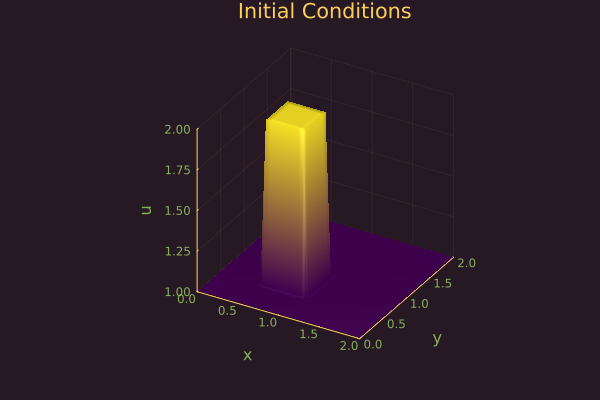

In [9]:
###Plot initial conditions
plot(x, y, un[:, :, 1], st = :surface, title = "Initial Conditions", xlabel = "x", ylabel = "y", zlabel = "u", colorbar = false)

In [11]:
### solve the diffusion equation
for n in 1:nt-1, j in 2:ny-1, i in 2:nx-1
    un[i, j, n+1] = un[i, j, n] + ν * dt / dx^2 * (un[i+1, j, n] - 2 * un[i, j, n] + un[i-1, j, n]) + ν * dt / dy^2 * (un[i, j+1, n] - 2 * un[i, j, n] + un[i, j-1, n])
end

┌ Info: Saved animation to /tmp/jl_Cm6GWG.gif
└ @ Plots /home/fuad/.julia/packages/Plots/wutJB/src/animation.jl:149


Plots.AnimatedGif("/tmp/jl_Cm6GWG.gif")
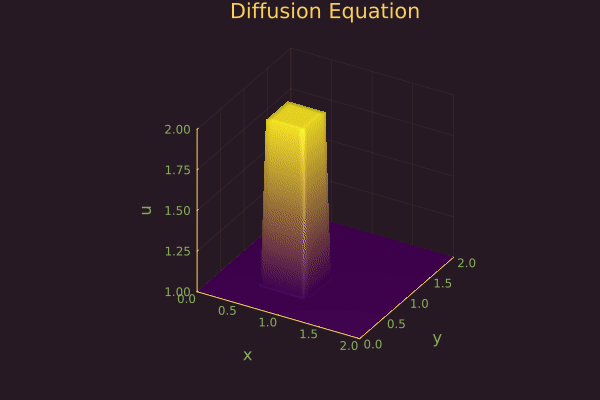

In [13]:
### Plot the solution using gif
@gif for i in 1:nt
    plot(x, y, un[:, :, i], st = :surface, title = "Diffusion Equation", xlabel = "x", ylabel = "y", zlabel = "u", colorbar = false)
end